![SpaceShip](https://img.nerdburglars.net/wp-content/uploads/2021/07/spaceship-names2.jpg)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **1. Import datasets, data exploration and visualisation tools**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Import datasets

In [3]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df = train_data.drop(['Transported'], axis=1) # drop the 'Transported' columns from train_data.
df = pd.concat([df, test_data], axis=0).reset_index(drop=True) #join the two dataframes so we can work with training and testing data at the same time

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [7]:
print(train_data.shape, test_data.shape, df.shape)

(8693, 14) (4277, 13) (12970, 13)


In [8]:
train_max = train_data.shape[0] #This will help us divide the dataframe back into training and testing sets later.
train_max

8693

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [10]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
#Check correlation of numerical features with the target variable.
train_data.select_dtypes(exclude = ["object"]).corr()['Transported'].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

In [12]:
cat_feat = train_data.select_dtypes(include = ["object"]).columns
cat_feat

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

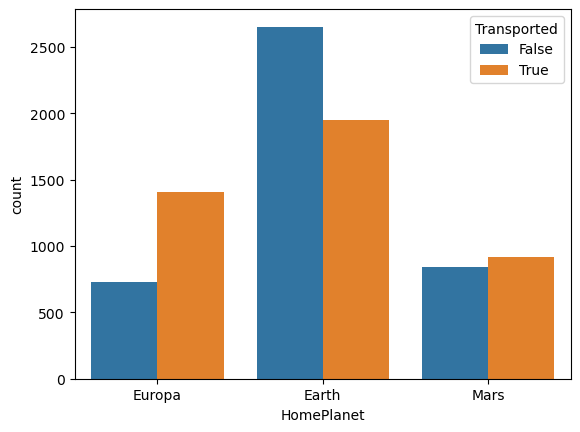

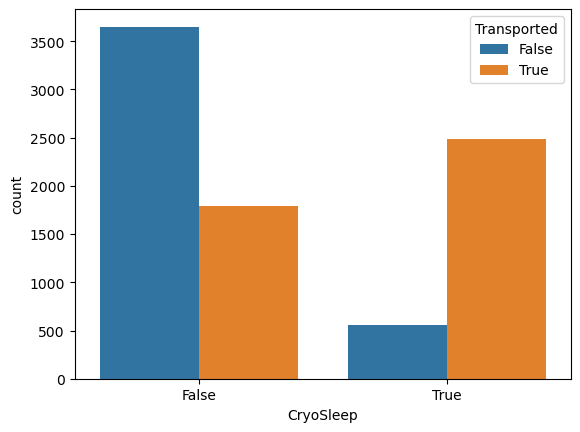

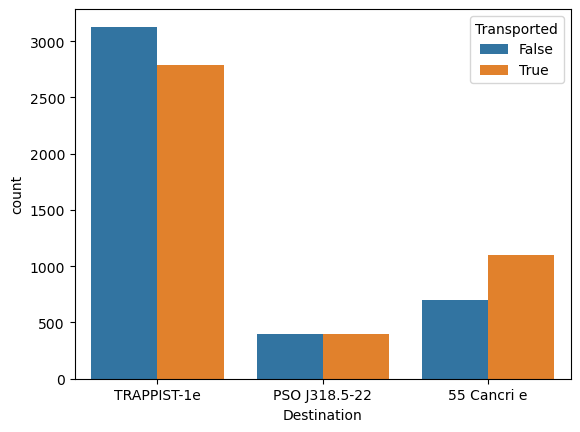

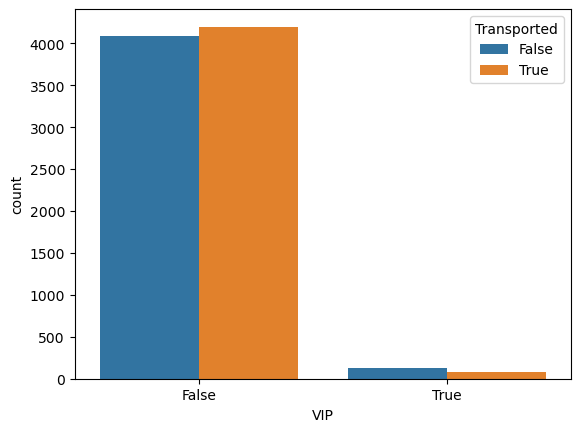

In [13]:
cat_list = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for feat in cat_list:
    sns.countplot(x=feat, hue='Transported', data=train_data)
    plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

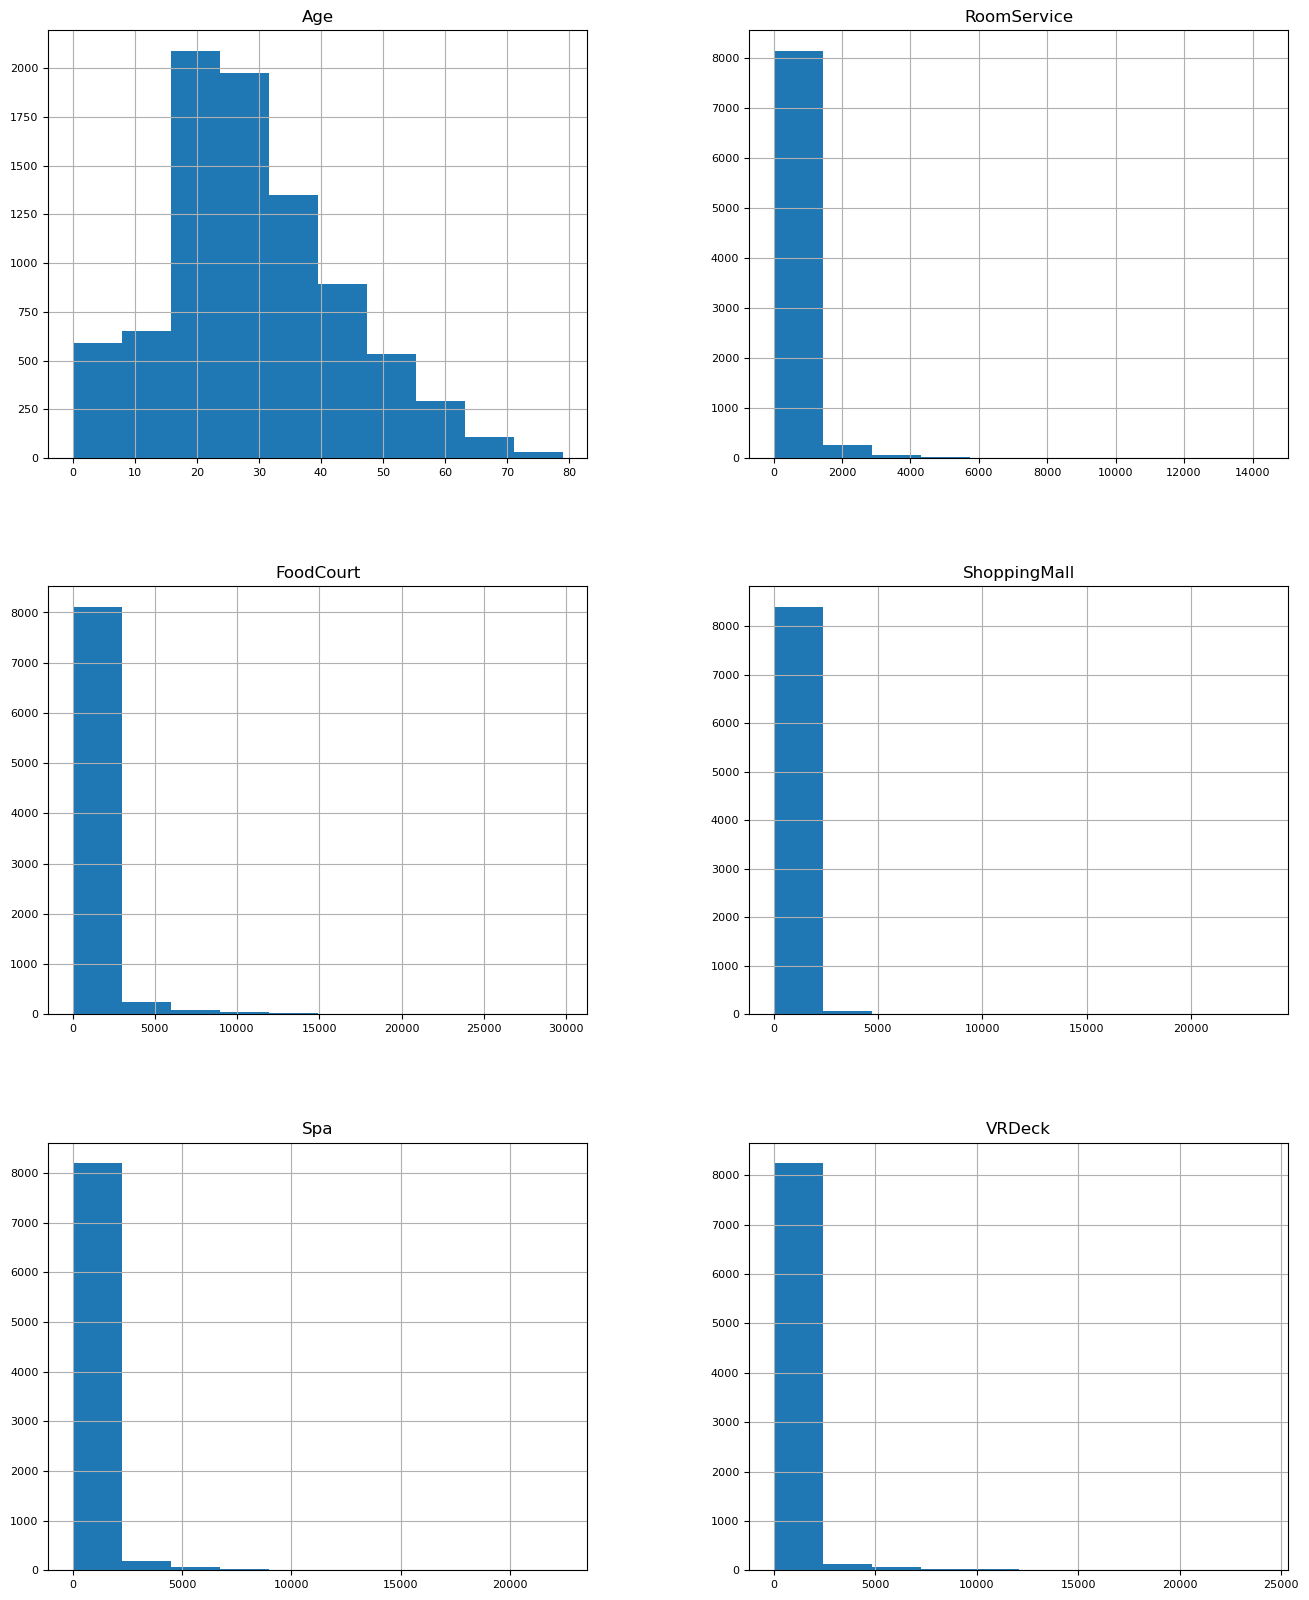

In [14]:
train_data[train_data.select_dtypes(exclude = ["object"]).columns.tolist()].hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

The charts above show some skewness. We will deal with this later on.

In [15]:
train_data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [16]:
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [17]:
df[df['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders
12673,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson
12725,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted
12852,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone


In [18]:
df['Group'] = df['PassengerId'] #The passengerId has some information we can retrieve such as the group number.
for i, group in enumerate(df['PassengerId']):
    df.loc[i, 'Group'] = group.split('_')[0]

In [19]:
df['Num'] = df['PassengerId'] #PassengerId also has information regarding the number of a person in relation to a group, we can use this later on to creat the group size
for i, num in enumerate(df['PassengerId']):
    df.loc[i, 'Num'] = num.split('_')[1]

In [20]:
df['Surname'] = df['Name']
for i, name in enumerate(df['Name']):
    if pd.isna(name) == False:
        df.loc[i, 'Surname'] = name.split()[1]

In [21]:
#This code will check if people from the same group have a surname, if no surname is observed the first non-NaN surname from the group will be used.

null_mask = pd.isna(df['Surname'])
groups = df['Group']

for i, value in enumerate(df['Surname']):
    if null_mask[i]:
        matching_indices = (groups == groups[i]) & (~pd.isna(df['Surname']))
        matching_surnames = df.loc[matching_indices, 'Surname']

        if not matching_surnames.empty:
            df.loc[i, 'Surname'] = matching_surnames.iloc[0]

In [22]:
#Now we have all the surnames we can gather accurately from the data, we can use them to chech for other features.
#The function below will take a feature argument and check if other members with the same group and surname have that feature.
#If the feature is present we can then replace the NaN.

def f_na(feature):
    null_mask = pd.isna(df[feature])
    groups = df['Group']
    surnames = df['Surname']

    for i, value in enumerate(df[feature]):
        if null_mask[i]:
            matching_indices = (groups == groups[i]) & (~pd.isna(df[feature])) & (surnames == surnames[i])
            matching_values = df.loc[matching_indices, feature]

            if not matching_values.empty:
                df.loc[i, feature] = matching_values.iloc[0]

In [23]:
df[df['Group'] == '8980']['HomePlanet'] #Same group people mainly share the same planet so it is safe to change these NaN

12827    Mars
12828    Mars
12829    Mars
12830    Mars
12831    Mars
12832    Mars
12833    Mars
Name: HomePlanet, dtype: object

In [24]:
f_na('HomePlanet')

In [25]:
df[df['Group'] == '8980']['Destination'] #Same group people mainly share the same Destination.

12827    TRAPPIST-1e
12828    55 Cancri e
12829    TRAPPIST-1e
12830    TRAPPIST-1e
12831            NaN
12832    TRAPPIST-1e
12833    TRAPPIST-1e
Name: Destination, dtype: object

In [26]:
df[df['Group'] == '8980'][['Destination', 'Surname']]

,Destination,Surname
12827,TRAPPIST-1e,Brie
12828,55 Cancri e,Brie
12829,TRAPPIST-1e,Brie
12830,TRAPPIST-1e,Bare
12831,NaN,Brie
12832,TRAPPIST-1e,Brie
12833,TRAPPIST-1e,Brie


In [27]:
f_na('Destination')

In [28]:
#Can't assume that people from the same group have the same value for CryoSleep
df[df['Group'] == '9238'][['CryoSleep', 'Surname', 'Age']] 

,CryoSleep,Surname,Age
12947,False,Garnettiz,10.0
12948,True,Emenez,3.0
12949,True,Emenez,16.0
12950,False,Emenez,26.0
12951,True,Emenez,14.0
12952,False,Garnettiz,0.0
12953,False,Emenez,32.0


In [29]:
df[df['Group'] == '8980']['Cabin'] #Same group people mainly share the same cabin.

12827    D/273/S
12828    D/273/S
12829    D/273/S
12830    D/273/S
12831    D/273/S
12832    D/273/S
12833    D/273/S
Name: Cabin, dtype: object

In [30]:
f_na('Cabin')

In [31]:
df[df['Group'] == '8980']['VIP'] #Same group people mainly share the same planet.

12827    False
12828    False
12829    False
12830    False
12831    False
12832    False
12833    False
Name: VIP, dtype: object

In [32]:
f_na('VIP')

In [33]:
df.isna().sum() 

PassengerId       0
HomePlanet      169
CryoSleep       310
Cabin           169
Destination     163
Age             270
VIP             183
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Group             0
Num               0
Surname         155
dtype: int64

We managed to solve some NaN with this strategy. The rest will be solved using sklearn

In [34]:
#This code will split the information in Cabin so we have the cabin number, deck and side of ship (code below)
df['Cabin_n'] = df['Cabin']
for i, name in enumerate(df['Cabin']):
    if pd.isna(name) == False:
        df.loc[i, 'Cabin_n'] = name.split('/')[1]

In [35]:
df['Cabin_d'] = df['Cabin']
for i, name in enumerate(df['Cabin']):
    if pd.isna(name) == False:
        df.loc[i, 'Cabin_d'] = name.split('/')[0]

In [36]:
df['Cabin_s'] = df['Cabin']
for i, name in enumerate(df['Cabin']):
    if pd.isna(name) == False:
        df.loc[i, 'Cabin_s'] = name.split('/')[2]

In [37]:
#To use the knn-impute from sklearn we first need to change the categoricals to numbers

planet_num = {'Europa': 1, 'Earth': 2, 'Mars': 3}
df['Planet_num'] = df['HomePlanet'].replace(planet_num)

cryo_num = {False: 0, True: 1}
df['Cryo_num'] = df['CryoSleep'].replace(cryo_num)

destination_num = {'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3}
df['Dest_num'] = df['Destination'].replace(destination_num)

num_n = {'01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8}
df['Num_n'] = df['Num'].replace(num_n)

vip_num = {False: 0, True: 1}
df['VIP_num'] = df['VIP'].replace(vip_num)

deck_level = {'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7, 'T' : 7}
df['Deck_num'] = df['Cabin_d'].replace(deck_level)

In [38]:
from sklearn.impute import KNNImputer

#List of categorical features to impute automaticly
na_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Planet_num', 'Cryo_num', 'Dest_num', 'Deck_num', 'VIP_num', 'Age', 'Spa', 'VRDeck']


knn_imp = KNNImputer()

df_num = pd.DataFrame(knn_imp.fit_transform(df[na_list]),
                      columns=df[na_list].columns)

In [39]:
df[na_list] = df_num

In [40]:
df[['Planet_num', 'Deck_num', 'Dest_num', 'VIP_num', 'Cryo_num']] = df[['Planet_num', 'Deck_num', 'Dest_num', 'VIP_num', 'Cryo_num']].astype(int)

In [41]:
#Replace numbers with categories again.
planet_num = {1 : 'Europa', 2 :'Earth', 3: 'Mars'}
df['HomePlanet'] = df['Planet_num'].replace(planet_num)

cryo_num = {0: False, 1: True}
df['CryoSleep'] = df['Cryo_num'].replace(cryo_num)

destination_num = {1: 'TRAPPIST-1e', 2: '55 Cancri e', 3: 'PSO J318.5-22'}
df['Destination'] = df['Dest_num'].replace(destination_num)

deck_level = {1: 'G', 2: 'F', 3: 'E', 4: 'D', 5: 'C', 6: 'B', 7: 'A', 7: 'T'}
df['Cabin_d'] = df['Deck_num'].replace(deck_level)

vip_num = {0: False, 1: True}
df['VIP'] = df['VIP_num'].replace(vip_num)

In [42]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           169
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Group             0
Num               0
Surname         155
Cabin_n         169
Cabin_d           0
Cabin_s         169
Planet_num        0
Cryo_num          0
Dest_num          0
Num_n             0
VIP_num           0
Deck_num          0
dtype: int64

This is a simple way to fix NaN.

In [43]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Surname,Cabin_n,Cabin_d,Cabin_s,Planet_num,Cryo_num,Dest_num,Num_n,VIP_num,Deck_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Ofracculy,0,B,P,1,0,1,1,0,6
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Vines,0,F,S,2,0,1,1,0,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Susent,0,T,S,1,0,1,1,1,7
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Susent,0,T,S,1,0,1,2,0,7
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Santantines,1,F,S,2,0,1,1,0,2


# **3. Data engineering**

## **3.1 Group_Size**

In [44]:
# Previously we got the group numbers from the id feature. With this information we can create a new feature called Group_Size

df['Group_Size'] = df['Num_n']
for i in range(len(df['Group'])):
    number1 = df.loc[i, 'Group']
    group_sizes = df.loc[i+1:, 'Num_n']
    matching_indices = (df.loc[i+1:, 'Group'] == number1) & (group_sizes > df.loc[i, 'Num_n'])

    if matching_indices.any():
        max_group_size = group_sizes[matching_indices].max()
        df.loc[i, 'Group_Size'] = max_group_size

## **3.2 Lucky_Age**

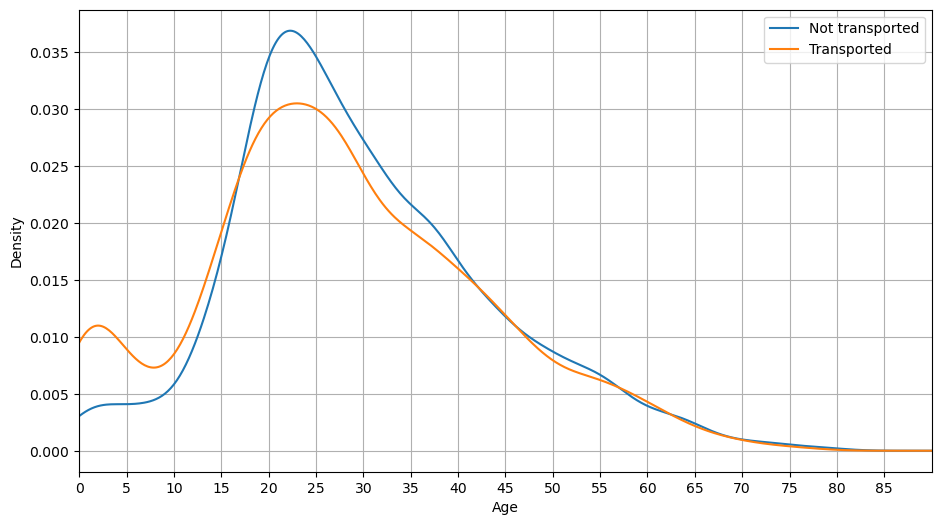

In [45]:
y = train_data['Transported']
X = df[:train_max].copy()

train_data = pd.concat([X, y], axis=1).copy() #join x_train values with Transported column for graph plotting.

plt.figure(figsize=(11, 6))
train_data[train_data['Transported'] == False]['Age'].plot(kind='kde', label = 'Not transported')
train_data[train_data['Transported'] == True]['Age'].plot(kind='kde', label = 'Transported')
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.xlim(0, 90)
plt.xticks(np.arange(0, 90, 5))
plt.show()

By looking at the intersepting points in the graph above we can create 4 different age groups that will hopefuly relate the relationship between age and being transported (hence the 'lucky_age').

In [46]:
df['lucky_age'] = pd.cut(x=df.Age, labels=[4, 2, 1, 3],
                            bins=[0, 16, 45, 55, df.Age.max()])

## **3.3 Total_Spent**

In [47]:
#This feature is just the sum of all the spenditure by each person on board.

df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

## **3.4 Money_spent**

In [48]:
#Binary feature where 0 signifies no money spent on board and 1 more than 0 spent.

df['Money_spent'] = df['TotalSpent']
for i in range(len(df['TotalSpent'])):
    if df.loc[i, 'TotalSpent'] == 0:
        df.loc[i, 'Money_spent'] = 0
    else:
        df.loc[i, 'Money_spent'] = 1

In [49]:
X = df[:train_max].copy()

train_data = pd.concat([X, y], axis=1).copy()

In [50]:
train_data.corr()['Transported'].sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.462920
Cryo_num        0.462920
Deck_num        0.117101
Group_Size      0.082644
Dest_num        0.069287
Num_n           0.066390
FoodCourt       0.043591
ShoppingMall    0.007530
VIP            -0.036408
VIP_num        -0.036408
Age            -0.072177
Planet_num     -0.101855
TotalSpent     -0.202402
VRDeck         -0.206045
Spa            -0.220016
RoomService    -0.244219
Money_spent    -0.481455
Name: Transported, dtype: float64

## **3.5 Solve skewness**

In [51]:
from scipy.stats import skew
num_feat = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
cat_feat = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin_s', 'Cabin_d', 'VIP', 'Group_Size', 'lucky_age', 'Money_spent']
train_cat = df[cat_feat]
train_num = df[num_feat]

skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5] #Skewness more than 0.5 (or -0.5) is the thereshold for transformation.
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

In [52]:
train_cat = pd.get_dummies(train_cat) #Create dummies for the categorical features
X = pd.concat([train_cat, train_num], axis=1) #Concatenate both categorical and numerical features back together.

In [53]:
X_train = X[:train_max].copy() #create train and test datasets for modeling
X_test = X[train_max:].copy()
y_train = train_data['Transported']

# **4. Modeling**

## **4.1. Import libraries**

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

k_fold = KFold(n_splits = 9, shuffle=True, random_state = 0)

## **4.2. CV Pipeline**

In [55]:
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc,mms,mas,rsc]

knn = KNeighborsClassifier(n_neighbors = 13)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=13)
gnb = GaussianNB()
svc = SVC()
gbc = GradientBoostingClassifier()
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

score_list = []
score_name = []

for scl in scl_list:
    scl.fit(X_train)
    X_train = scl.transform(X_train)
    X_test = scl.transform(X_test)
    for clf in clf_list:
        scoring = "accuracy"
        score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)
        score_name.append(str(scl)+":"+str(clf))
        score = round(np.mean(score)*100,2)
        score_list.append(score)   

In [56]:
for index, score in enumerate(score_list):
    if score > 79:
        print(index, score)

4 79.31
5 80.08
11 80.08
17 80.08
22 80.08
23 80.08


In [57]:
score_name[23] #Check best scaler and model

'RobustScaler():GradientBoostingClassifier()'

## **4.3. GridSearch**

In [58]:
scl = RobustScaler()
scl.fit(X_train)
scl.transform(X_train)
scl.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)
clf = GradientBoostingClassifier()

parameters = {'learning_rate': [0.02],
              'subsample'    : [0.5],
              'n_estimators' : [500],
              'max_depth'    : [4]
             }


gs = GridSearchCV(clf, scoring='accuracy', param_grid = parameters, cv=cv, verbose=False)
gs.fit(X_train, y_train)
print(gs.score(X_train, y_train))
params = gs.best_params_
print(params)

0.8341194064189578
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [59]:
#Fit the final model and make predictions
model = GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=500,
                           subsample=0.5)

In [60]:
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': predictions})

In [61]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
